## Ejemplo 4: Scatterplots con variables condicionantes

### 1. Objetivos:
    - Aprender a generar e interpretar scatterplots con variables condicionantes
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


Por ejemplo, digamos que queremos visualizar las diferencias de peso y altura que hay entre los atletas que juegan basketball, volleyball, football y beisball:

In [4]:
df_grouped = df.groupby('name')[['height', 'weight', 'sport']].max()

In [5]:
# Sólo me quedo con las disciplinas de pelota
df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

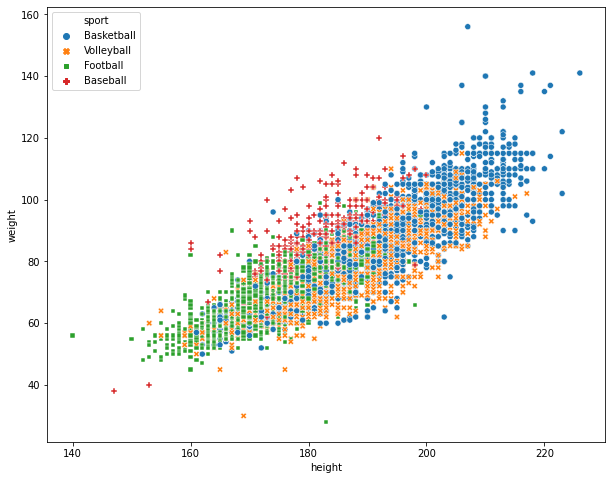

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(x = df_ball['height'], y = df_ball['weight'], hue=df_ball['sport'], style=df_ball['sport'], ax=ax);

Utilizando este scatterplot por categorías ya podemos darnos una idea de las diferencias. Pero hay cierta confusión en la parte central de la gráfica donde están concentrados todos los deportes. Es difícil diferenciar los puntos cuando hay aglomeraciones tan grandes. Podemos entonces generar un scatterplot con variables condicionantes para ayudarnos:

In [10]:
# creamos un dataset para cada disciplina

basket = df_ball[df_ball['sport'] == 'Basketball']
volley = df_ball[df_ball['sport'] == 'Volleyball']
foot = df_ball[df_ball['sport'] == 'Football']
base = df_ball[df_ball['sport'] == 'Baseball']

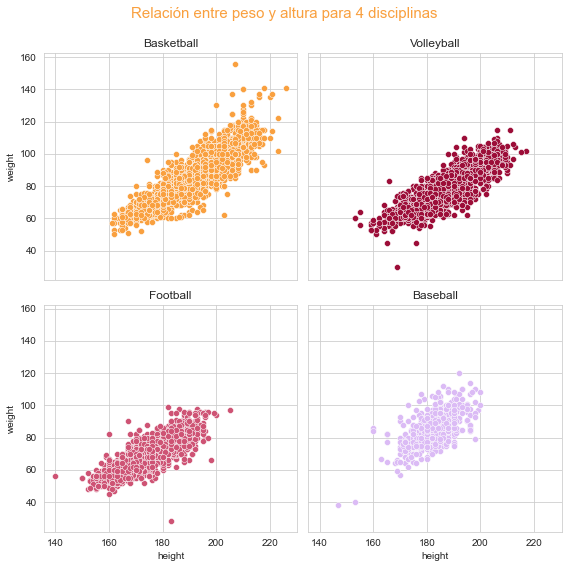

In [13]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True) # Muy importante. Dice que van compartir canvas o ejes o plano

# Dibujo cada scatterplot

sns.scatterplot(x = basket['height'], y = basket['weight'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x = volley['height'], y = volley['weight'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x = foot['height'], y = foot['weight'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x= base['height'], y = base['weight'], ax=axes[1, 1], color=palette[3]);


#Le pongo título a las subgraficas
axes[0, 0].set_title('Basketball')
axes[0, 1].set_title('Volleyball')
axes[1, 0].set_title('Football')
axes[1, 1].set_title('Baseball')

# Le pongo título a la grafica
fig.suptitle('Relación entre peso y altura para 4 disciplinas', fontsize=15, c=palette[4], x=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

¡Genial¡ Ahora sí tenemos mucha más claridad acerca de cómo están repartidos los atletas que juegan estos 4 deportes. Podemos ver que cada deporte tiene ciertas tendencias muy claras. Aunque hay mucha superposición, hay diferencias claras.